<a href="https://colab.research.google.com/github/LorenzoJoquino/AP157/blob/main/App_Physics_157_Digital_Image_Formation_and_Enhancement.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


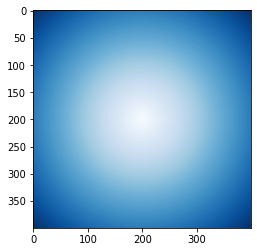

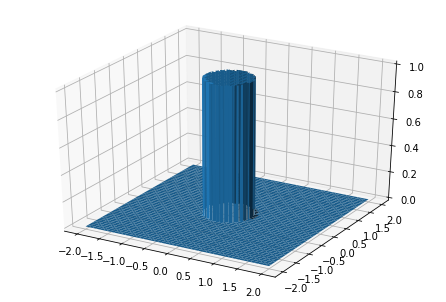

In [ ]:
N = 400 #the higher num is the finer
radius = 0.5
#x = np.linspace(-2*radius,2*radius,num = N)
x = np.linspace(-2,2,num = N)
y = x
X,Y = np.meshgrid(x,y)
R = np.sqrt(X**2 + Y**2)

#forming a 2d image showing circle by boolean 
A = np.zeros(np.shape(R))
A[np.where(R<radius)] = 1.0
plt.imshow(A, cmap = "gray") #display as an image

#forming 2d image with gradient 
grad = R 
plt.imshow(grad, cmap = "Blues")

#forming the 3d image
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = Axes3D(fig)
ax.plot_surface(X,Y,A)

##Activity 1.1 
selected items only since I did them already in matlab 

In [ ]:
%grid with pixel size 

pixel_size = 5
X_rev = X
for i in range(len(X_rev)):
  for j in range(len(X_rev[i])):
    X_rev[i][j] = not((j+1)%(pixel_size+1) == 0)

Y_rev = Y 
for i in range(len(Y_rev)):
  for j in range(len(Y_rev[i])):
    Y_rev[i][j] = not((i+1)%(pixel_size+1) == 0)

In [ ]:
R = X_rev*Y_rev

#forming 2d image with gradient 
grad = R 
plt.imshow(grad, cmap = "Blues")

#forming the 3d image
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = Axes3D(fig)
ax.plot_surface(X,Y,R)

##Image and Colors 

Activity 1.2 

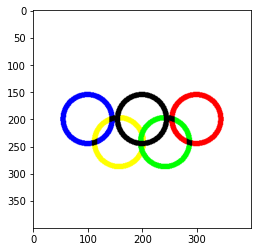

In [ ]:
N = 400
x = np.linspace(-20, 20,num = N)
y = x
X,Y = np.meshgrid(x,y)

#Each color has a 2d array corresponding to the values of that color at each component 
Rd, Gn, Bl = np.zeros((N,N)), np.zeros((N,N)), np.zeros((N,N))


#draw colored circles
Rhor, Rc, deg = 10, 5, 45
Rangle = 6
Ri = Rc - 1   
#Rt - how far apart from center, Rc - radius of circle #deg - degrees below x-axis are the blue and green circles, red is fixed 

xt, yt = Rangle*np.cos(deg*np.pi/180), Rangle*np.sin(deg*np.pi/180) #location of center of circles  

#R variables define the circle, then assign points inside that circle as 1  

#Coloring by subtraction - if it is not part of the ring, it gets a value of 0, otherwise, it retains their previous value 

#black circle in middle (no color) 
R = np.sqrt((X)**2 + (Y)**2)  
Rd = np.where(((R<Rc)&(R>Ri)), 0, 1)
Gn = np.where(((R<Rc)&(R>Ri)), 0, 1)
Bl = np.where(((R<Rc)&(R>Ri)), 0, 1)


#left circle (Blue)
R = np.sqrt((X+Rhor)**2 + (Y)**2)
Rd = np.where(((R<Rc)& (R>Ri)), 0, Rd)
Gn = np.where(((R<Rc)&(R>Ri)), 0, Gn)


#right circle (red)
R = np.sqrt((X-Rhor)**2 + (Y)**2)
Gn = np.where(((R<Rc)&(R>Ri)), 0, Gn)
Bl = np.where(((R<Rc)&(R>Ri)), 0, Bl)


#lower left circle (Yellow)
R = np.sqrt((X+xt)**2 + (Y-yt)**2)
Bl = np.where(((R<Rc)&(R>Ri)), 0, Bl)


#lower right circle (Green)
R = np.sqrt((X-xt)**2 + (Y-yt)**2)
Bl = np.where(((R<Rc)&(R>Ri)), 0, Bl)
Rd = np.where(((R<Rc)& (R>Ri)), 0, Rd)

I = np.zeros((N,N,3))
I[...,0] = Rd  # I[...,0] will always be assigned red?, I[...,1] will always be assigned green and I[...,2] --> blue
I[...,1] = Gn 
I[...,2] = Bl

"""
with np.printoptions(threshold=np.inf):
  print(Rd)
  print(Gn)
  print(Bl)"""


fig = plt.figure()
plt.imshow(I, cmap = 'hsv_r')


Let's try the Philippine SEA GAMES LOGO 

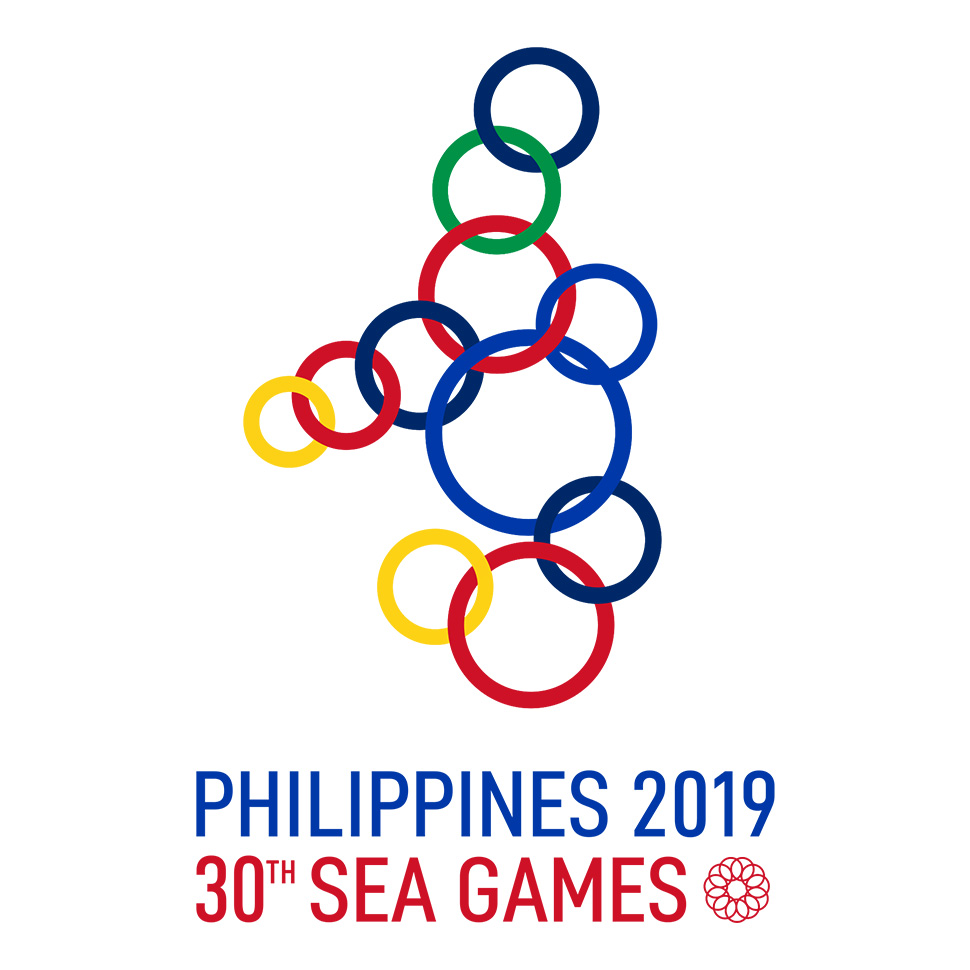

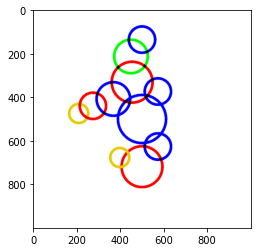

In [ ]:
N = 1000
x = np.linspace(-30, 30,num = N)
y = x
X,Y = np.meshgrid(x,y)

#Each color has a 2d array corresponding to the values of that color at each component 
Rd, Gn, Bl = np.zeros((N,N)), np.zeros((N,N)), np.zeros((N,N))
Rd, Gn, Bl = Rd +1 , Gn +1, Bl+1 

#positions and sizes of circles 
radii = np.array([3, 4, 5, 4, 5, 6, 4, 7, 4, 6, 3,5])
deg = np.array([175, 165, 145, 90, 100, 105, 60, 0, -60, -90, -120])
color = ['y', 'r', 'bl', 'bl', 'g', 'r', 'bl', 'bl', 'bl', 'r', 'y']
pos = np.array([10, 8, 5.5, 12.5, 10, 6, 5, 0, 5, 7.5, 7])*1.75 #the *1.75 is just to adjust, nothing special 

radii_in = radii - 0.75 
xt, yt = pos*np.cos(deg*np.pi/180), pos*np.sin(deg*np.pi/180) #location of center of circles  

#Coloring by subtraction - if it is not part of the ring, it gets a value of 0, otherwise, it retains their previous value
#Reason is that the background is white  

for circle_index in range(len(color)):
   R = np.sqrt((X-xt[circle_index])**2 + (Y+yt[circle_index])**2)
   if color[circle_index] == 'y':
     Bl = np.where(((R<radii[circle_index])&(R>radii_in[circle_index])), 0, Bl)
     #just to make things a bit darker...
     Gn = np.where(((R<radii[circle_index])&(R>radii_in[circle_index])), 0.8, Gn)
     Rd = np.where(((R<radii[circle_index])&(R>radii_in[circle_index])), 0.9, Rd)
   elif color[circle_index] == 'r':
     Bl = np.where(((R<radii[circle_index])&(R>radii_in[circle_index])), 0, Bl)
     Gn = np.where(((R<radii[circle_index])&(R>radii_in[circle_index])), 0, Gn)
   elif color[circle_index] == 'g':
     Bl = np.where(((R<radii[circle_index])&(R>radii_in[circle_index])), 0, Bl)
     Rd = np.where(((R<radii[circle_index])&(R>radii_in[circle_index])), 0, Rd)
   elif color[circle_index] == 'bl':
     Gn = np.where(((R<radii[circle_index])&(R>radii_in[circle_index])), 0, Gn)
     Rd = np.where(((R<radii[circle_index])&(R>radii_in[circle_index])), 0, Rd)
   else:
     print("error")
     break 

I = np.zeros((N,N,3))
I[...,0] = Rd  # I[...,0] will always be assigned red?, I[...,1] will always be assigned green and I[...,2] --> blue
I[...,1] = Gn 
I[...,2] = Bl

"""
with np.printoptions(threshold=np.inf):
  print(Rd)
  print(Gn)
  print(Bl)"""


fig = plt.figure()
plt.imshow(I, cmap = 'hsv_r')
